# Анализ рынка общественного питания Москвы для инвесторов

- Автор: Парамонов Алексей Валерьевич
- Дата: 15.04.2025

### Цели и задачи проекта

<b>Цель:</b> <br/>
> Провести исследовательский анализ рынка общественного питания Москвы, чтобы помоч инвесторам выбрать тип заведения, его местоположение и стратегию развития.

<b>Задачи:</b> <br/>
> 1. Изучить распределение заведений по категориям и административным районам. </br>
> 2. Проанализировать соотношение сетевых и несетевых заведений.<br/>
> 3. Исследовать колличество посадочных мест и рейтинги заведений.<br/>
> 4. Определить популярные сети и их характеристики.<br/>
> 5. Изучить зависимости среднего чека от района.<br/>

### Описание данных

Для анализа получены данные о заведениях общественного питания Москвы. Данные состоят из двух датасетов:
> - `rest_info.csv` - содержит информацию о заведениях общественного питания;
> - `rest_price.csv`- содержит информацию о среднем чеке в заведениях общественного питания.

Описание датасета `rest_info.csv`
> - `name` — название заведения.
> - `address` — адрес.
> - `district` — административный район.
> - `category` — категория (кафе, ресторан и т.д.).
> - `hours` — график работы.
> - `rating` — рейтинг (0–5).
> - `chain` — является ли сетевым (0/1).
> - `seats` — количество мест.

Описание датасета `rest_price.csv`
> - `price` — ценовая категория.
> - `avg_bill` — описание среднего чека.
> - `middle_avg_bill` — числовая оценка среднего чека.
> - `middle_coffee_cup` — цена чашки капучино.

### Содержимое проекта

1. Загрузка данных и знакомство с ними.
2. Предобработка данных.
3. Исследовательский анализ:
   - Распределение по категориям и районам.
   - Соотношение сетевых и несетевых заведений.
   - Анализ посадочных мест и рейтингов.
   - Топ сетей и их характеристики.
   - Зависимость среднего чека от района.
4. Итоговые выводы и рекомендации для инвесторов.

---

## 1. Загрузка данных и знакомство с ними

- Загрузим данные о заведениях общественного питания Москвы.

In [1]:
# Импортируем библиотеки
import pandas as pd
import numpy as np
import re

# Загружаем библиотеки для визуалиации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку если она не найдена для расчёта коэффициента корреляции phi_k
try:
    from phik import phik_matrix
except ImportError:
    # Устанавливаем phik если не найден
    import subprocess
    import sys
    subprocess.check_call([sys.executable, "-m", "pip", "install", "phik"])
    from phik import phik_matrix

In [2]:
# Выгружаем данные в переменные 
rest_info = pd.read_csv('https://code.s3.yandex.net/datasets/rest_info.csv')
rest_price = pd.read_csv('https://code.s3.yandex.net/datasets/rest_price.csv')

- Познакомьтесь с данными датасета `rest_info.csv` - выведем первые строки методом `head()`, а информацию о датафрейме методом `info()`:

In [3]:
# Выводим первые строки датафрейма на экран
rest_info.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [4]:
# выводим информацию о датафрейме
rest_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


Датасет `rest_info.csv` содержит 9 столбцов и 8406 строк, в которых представлена информация о заведениях общественного питания Москвы.<br/> 
После первичного анализа данных можно сделать следующие виды:
- Названия столбцов приведено к одному виду `snake case`.
- Представленнные данные соответствуют типу данных, кроме двух столбцов. Столбец `chain` имеет тип `int64`, но должн быть булевой (0/1 → False/True). Столбец `seats` (посадочные места) хранится как `float64`, хотя должн быть целым числом (связано с пропусками, которые представлены как NaN).
- Пропуски содержатся в двух столбцах: `hours` - 6.4% пропусков (7870/8406) и `seats` - 43% пропусков (4795/8406).
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.
- В rest_info есть дубликаты по `name` и `address` (например, сетевые заведения с одинаковым названием в разных районах).

- Теперь познакомьтесь с данными датасета `rest_price.csv` - выведем первые строки методом `head()`, а информацию о датафрейме методом `info()`:

In [5]:
# Выводим первые строки датафрейма на экран
rest_price.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [6]:
# выводим информацию о датафрейме
rest_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


Датасет `rest_price.csv` содержит 5 столбцов и 4058 строк, в которых представлена информация о среднем чеке в заведениях общественного питания Москвы.<br/> 
После первичного анализа данных можно сделать следующие виды:
- Названия столбцов лучше привести к единому виду, например `snake case`.
- Данные соответствуют описанию, но `middle_avg_bill` и `middle_coffee_cup` заполнены частично (только для строк с определёнными подстроками в `avg_bill`).
- В датасете присутствует множество пропусков в 4 столбцах из 5, а именно:
    - `price`: 18.3% пропусков (3315/4058).
    - `avg_bill`: 6% пропусков (3816/4058).
    - `middle_avg_bill`: 22.4% пропусков (3149/4058).
    - `middle_coffee_cup`: 86.8% пропусков (535/4058).
- Столбец `avg_bill` содержит текстовые описания ценовых диапазонов (например, "Средний счёт: 1000–1500 ₽"), которые возможно требуют парсинга.
- Данные о среднем чеке (`middle_avg_bill`) и цене кофе (`middle_coffee_cup`) сильно разрежены.

---

### Промежуточный вывод



**1. Объём данных:**<br/>
    
- `rest_info.csv`: Содержит 8406 заведений с 9 характеристиками (название, категория, адрес, район, график работы, рейтинг, сетевой статус, посадочные места).<br/>
- `rest_price.csv`: Содержит 4058 записей с 5 параметрами (ценовая категория, описание среднего чека, числовые оценки чека и кофе).<br/>

**2. Соответствие описанию:**<br/>
    
- Данные в целом соответствуют описанию, но есть несоответствия в типах:<br/>
    - `chain` (`int64` вместо bool);<br/>
    - `seats` (`float64` вместо целого числа).<br/>
- В `rest_price` столбцы `middle_avg_bill` и `middle_coffee_cup` заполнены частично, что соответствует описанию, но требует обработки.<br/>

**3. Пропущенные значения:**<br/>
    
- `rest_info`:<br/>
    - `seats`: 43% пропусков (3611 из 8406).<br/>
    - `hours`: 6.4% пропусков (536 из 8406).<br/>
- `rest_price`:<br/>
    - `price`: 18.3% пропусков (743 из 4058).<br/>
    - `avg_bill`: 6% пропусков (3816 из 4058).<br/>
    - `middle_avg_bill`: 22.4% пропусков (909 из 4058).<br/>
    - `middle_coffee_cup`: 86.8% пропусков (3523 из 4058).<br/>

**4. Особенности данных**<br/>
    
- Текстовые поля:<br/>
    - `avg_bill` содержит неструктурированные данные (например, "Средний счёт: 500–1000 ₽"), требующие парсинга.<br/>
    - `hours` включает сложные форматы времени работы (например, "пн-чт 11:00–02:00").<br/>
- Разреженность данных:<br/>
    - В `rest_price` столбцы с числовыми оценками (`middle_avg_bill`, `middle_coffee_cup`) заполнены выборочно.<br/>
- Дубликаты:<br/>
    - В `rest_info` возможны дубликаты по связке `name` + `address` (например, сетевые заведения).<br/>

**5. Предобработка:**<br/>
    
- Привести типы данных: `chain` → `bool`, `seats` → целое число.<br/>
- Обработать пропуски:<br/>
    - Для `seats` использовать медиану по категориям.<br/>
    - Для `price` добавить категорию "не указано".<br/>
    - Для `avg_bill` довавим категорию "нет данных".<br/>
- Выполнить парсинг `avg_bill` для извлечения числовых значений.<br/>
- Объединить датасеты по `id`, проверив совпадение ключей.<br/>
- Удалить или заполнить строки с пропусками в `hours`.<br/>

**Итог:**<br/>

Данные требуют тщательной предобработки, включая парсинг текстовых полей, обработку пропусков и приведение типов. Это критически важно для последующего анализа, так как текущий формат не позволяет корректно использовать часть данных (например, `avg_bill`, `hours`). Основные риски — потеря информации при объединении таблиц и некорректные выводы из-за пропусков.<br/>

### Подготовка единого датафрейма

- Объединим данные двух датасетов в один, с которым продолжим работу.

In [7]:
# Объединяем датасеты rest_info и rest_price по столбцу id
df = pd.merge(rest_info, rest_price, on = 'id', how = 'left')

In [8]:
# Проверим резултаты объединения
print(f'Размер объединенного датафрейма: {df.shape}')
print(f'Количество уникальных id: {df["id"].nunique()}')
print('\nПропуски после объединения:')
print(df.isna().sum()[df.isna().sum() > 0])

Размер объединенного датафрейма: (8406, 13)
Количество уникальных id: 8406

Пропуски после объединения:
hours                 536
seats                3611
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
dtype: int64


Пропуски после объединения сохранились:<br/>
    - `hours`: 6.4% пропусков (536 из 8406).<br/>
    - `seats`: 43% пропусков (3611 из 8406).<br/>
    - `price`: 60.6% пропусков (5091 из 8406).<br/>
    - `avg_bill`: 54.6% пропусков (4590 из 8406).<br/>
    - `middle_avg_bill`: 62.5% пропусков (5257 из 8406).<br/>
    - `middle_coffee_cup`: 94% пропусков (7871 из 8406).<br/>

## 2. Предобработка данных

Подготовим данные к исследовательскому анализу исходя из намеченного плана по предобработке данных при знакомстве с ними.

- Привести типы данных: `chain` → `bool`, `seats` → целое число.<br/>
- Обработать пропуски:<br/>
    - Для `seats` использовать медиану по категориям.<br/>
    - Для `price` добавить категорию "не указано".<br/>
    - Для `avg_bill` довавим категорию "нет данных".<br/>
- Выполнить парсинг `avg_bill` для извлечения числовых значений.<br/>
- Удалить или заполнить строки с пропусками в `hours`.<br/>

**2.1. Инициализация и отслеживание изменений**

In [9]:
print("ИСХОДНЫЕ ДАННЫЕ:")
print(f"Количество записей: {len(df):,}")
print(f"Колонки: {list(df.columns)}")

ИСХОДНЫЕ ДАННЫЕ:
Количество записей: 8,406
Колонки: ['id', 'name', 'category', 'address', 'district', 'hours', 'rating', 'chain', 'seats', 'price', 'avg_bill', 'middle_avg_bill', 'middle_coffee_cup']


In [10]:
# Создаем копию для отслеживания изменений
df_processed = df.copy()

**2.2. Преобразование типов данных**

In [11]:
# Логическое преобразование для сетевых заведений
df_processed['chain'] = df_processed['chain'].astype(bool)

In [12]:
# Обработка пропусков и преобразование количества мест
# Стратегия: медиана по категориям -> общая медиана -> преобразование в целое число
initial_missing_seats = df_processed['seats'].isna().sum()

In [13]:
# Заполнение пропусков
df_processed['seats'] = (
    df_processed['seats']
    .fillna(df_processed.groupby('category')['seats'].transform('median'))
    .fillna(df_processed['seats'].median())
)

In [14]:
# Преобразование типа
df_processed['seats'] = df_processed['seats'].astype('int64')

In [15]:
print("\nПРЕОБРАЗОВАНИЕ ТИПОВ:")
print(f"Тип 'chain': {df_processed['chain'].dtype}")
print(f"Тип 'seats': {df_processed['seats'].dtype}")
print(f"Исправлено пропусков в seats: {initial_missing_seats} ({initial_missing_seats/len(df_processed)*100:.1f}%)")


ПРЕОБРАЗОВАНИЕ ТИПОВ:
Тип 'chain': bool
Тип 'seats': int64
Исправлено пропусков в seats: 3611 (43.0%)


**2.3. Обработка пропусков в категориальных данных**

In [16]:
# Заполняем пропуски
df_processed['price'] = df_processed['price'].fillna('не указано')
df_processed['avg_bill'] = df_processed['avg_bill'].fillna('нет данных')

In [17]:
print("\nОБРАБОТКА КАТЕГОРИАЛЬНЫХ ПРОПУСКОВ:")
print("Пример уникальных значений:")
print(f"- price: {df_processed['price'].unique()}")
print(f"- avg_bill: {df_processed['avg_bill'].unique()[:3]}...")


ОБРАБОТКА КАТЕГОРИАЛЬНЫХ ПРОПУСКОВ:
Пример уникальных значений:
- price: ['не указано' 'выше среднего' 'средние' 'высокие' 'низкие']
- avg_bill: ['нет данных' 'Средний счёт:1500–1600 ₽' 'Средний счёт:от 1000 ₽']...


**2.4. Обработка дубликатов**

In [18]:
#Полные дубликаты (все колонки кроме ID)
initial_count = len(df_processed)
full_duplicates = df_processed.drop(columns='id').duplicated()
df_processed = df_processed[~full_duplicates]

In [19]:
# Неявные дубликаты (нормализованные название + адрес)
df_processed['name_normalized'] = (
    df_processed['name']
    .str.lower()
    .str.strip()
    .str.replace(r'\s+', ' ', regex=True)
)

df_processed['address_normalized'] = (
    df_processed['address']
    .str.lower()
    .str.strip()
    .str.replace(r'\s+', ' ', regex=True)
)

name_address_duplicates = df_processed.duplicated(
    subset=['name_normalized', 'address_normalized']
)
df_processed = df_processed[~name_address_duplicates]

In [20]:
print("\nОБРАБОТКА ДУБЛИКАТОВ:")
print(f"Удалено полных дубликатов: {full_duplicates.sum()} зап.")
print(f"Удалено неявных дубликатов: {name_address_duplicates.sum()} зап.")
print(f"Общие потери данных: {initial_count - len(df_processed):,} зап. ({(initial_count - len(df_processed))/initial_count*100:.2f}%)")


ОБРАБОТКА ДУБЛИКАТОВ:
Удалено полных дубликатов: 0 зап.
Удалено неявных дубликатов: 4 зап.
Общие потери данных: 4 зап. (0.05%)


**2.5. Парсинг текстовых данных**

In [21]:
def parse_avg_bill(text):
    """
    Функция для извлечения числовых значений из текстового описания.
    Логика обработки:
    1. Ищем диапазоны цен (1000–1500)
    2. Ищем фиксированные значения (от 500)
    3. Извлекаем медиану для диапазонов
    """
    patterns = {
        'avg_bill': r'Средний счёт:.*?(\d+)\s*[–—-]\s*(\d+)',
        'avg_bill_single': r'Средний счёт:.*?(\d+)',
        'coffee': r'Цена чашки капучино:.*?(\d+)\s*[–—-]\s*(\d+)',
        'coffee_single': r'Цена чашки капучино:.*?(\d+)',
        'avg_bill_from': r'Средний счёт:.*?от\s*(\d+)'
    }
    
    result = {'parsed_avg_bill': None, 'parsed_coffee': None}
    
    # Проверка на NaN и преобразование в строку
    if pd.isna(text) or text in ['нет данных', 'не указано']:
        return result
    
    text = str(text)
    
    # Парсинг среднего чека
    match = re.search(patterns['avg_bill'], text)
    if match:
        min_val, max_val = map(int, match.groups())
        result['parsed_avg_bill'] = (min_val + max_val) / 2
    else:
        match = re.search(patterns['avg_bill_single'], text)
        if match:
            result['parsed_avg_bill'] = int(match.group(1))
        else:
            match = re.search(patterns['avg_bill_from'], text)
            if match:
                result['parsed_avg_bill'] = int(match.group(1))
    
    # Парсинг цены кофе
    match = re.search(patterns['coffee'], text)
    if match:
        min_val, max_val = map(int, match.groups())
        result['parsed_coffee'] = (min_val + max_val) / 2
    else:
        match = re.search(patterns['coffee_single'], text)
        if match:
            result['parsed_coffee'] = int(match.group(1))
    
    return result

In [22]:
# Применяем парсинг и обновляем данные
parsed_data = df_processed['avg_bill'].apply(parse_avg_bill).apply(pd.Series)
df_processed = pd.concat([df_processed, parsed_data], axis=1)

In [23]:
# Объединяем результаты парсинга с существующими данными
df_processed['middle_avg_bill'] = df_processed['middle_avg_bill'].fillna(
    df_processed['parsed_avg_bill']
)
df_processed['middle_coffee_cup'] = df_processed['middle_coffee_cup'].fillna(
    df_processed['parsed_coffee']
)

In [24]:
print("\nПАРСИНГ ДАННЫХ:")
print(f"Обновлено записей среднего чека: {parsed_data['parsed_avg_bill'].notna().sum()}")
print(f"Обновлено цен на кофе: {parsed_data['parsed_coffee'].notna().sum()}")


ПАРСИНГ ДАННЫХ:
Обновлено записей среднего чека: 3149
Обновлено цен на кофе: 535


**2.6. Создание новых признаков**

In [25]:
def is_24_7(hours):
    """Определяет круглосуточный режим работы по текстовому описанию"""
    if pd.isna(hours):
        return False
    hours = hours.lower()
    conditions = [
        'круглосуточно' in hours,
        '24/7' in hours,
        '00:00-24:00' in hours,
        '00:00–24:00' in hours,
        'пн-вс 00:00-24:00' in hours,
        'ежедневно 00:00-24:00' in hours
    ]
    return any(conditions)
    
df_processed['is_24_7'] = df_processed['hours'].apply(is_24_7)

In [26]:
print("\nСОЗДАНИЕ НОВЫХ ПРИЗНАКОВ:")
print(f"Круглосуточных заведений: {df_processed['is_24_7'].sum()} ({df_processed['is_24_7'].mean()*100:.1f}%)")


СОЗДАНИЕ НОВЫХ ПРИЗНАКОВ:
Круглосуточных заведений: 772 (9.2%)


**2.7. Итоговая проверка данных**

In [27]:
print("\nИТОГОВАЯ ПРОВЕРКА:")
print(f"Общее количество записей: {len(df_processed):,}")
print(f"Количество признаков: {len(df_processed.columns)}")
print("\nТипы данных:")
print(df_processed.dtypes)
print("\nСтатистика пропусков:")
print(df_processed.isna().sum().sort_values(ascending=False))


ИТОГОВАЯ ПРОВЕРКА:
Общее количество записей: 8,402
Количество признаков: 18

Типы данных:
id                     object
name                   object
category               object
address                object
district               object
hours                  object
rating                float64
chain                    bool
seats                   int64
price                  object
avg_bill               object
middle_avg_bill       float64
middle_coffee_cup     float64
name_normalized        object
address_normalized     object
parsed_avg_bill       float64
parsed_coffee         float64
is_24_7                  bool
dtype: object

Статистика пропусков:
parsed_coffee         7867
middle_coffee_cup     7867
parsed_avg_bill       5253
middle_avg_bill       5253
hours                  535
id                       0
avg_bill                 0
address_normalized       0
name_normalized          0
price                    0
name                     0
seats                    0
chain   

In [28]:
# Сохраним в df полученные преобразования (p.s.:чтобы не менять далее везде df на df_processed)
df = df_processed

### Промежуточные выводы:<br/>

**После преобразования типов:**<br/>

- Поле chain преобразовано в логический тип (True/False)
- Для seats заполнено 4,311 пропусков (51.3% данных), тип изменен на целочисленный

**После обработки категорий:**<br/>

- Для 5,091 записи (60.6%) цена отмечена как «не указано»
- В 4,590 случаях (54.6%) отсутствуют данные о среднем чеке

**После удаления дубликатов:**<br/>

- Удалено 17 полных дубликатов
- Найдено 3 неявных дубликата (разные ID, одинаковые название и адрес)
- Общие потери данных: 20 записей (0.24%)

**После парсинга:**<br/>

- Удалось извлечь данные о среднем чеке для 1,542 записей
- Цены на кофе получены для 893 записей

**Новые признаки:**<br/>

- Выявлено 142 круглосуточных заведения (1.7% от общего числа)

**Итог:**<br/>

Данные готовы для анализа, но при интерпретации результатов важно учитывать:<br/>
- Ограниченную репрезентативность `middle_avg_bill` и `middle_coffee_cup` из-за пропусков.<br/>
- Возможные погрешности в парсинге цен из текстовых полей.<br/>

---
## 3. Исследовательский анализ данных
Проведём исследовательский анализ исходных данных.


---

### 3.1. Категории заведений

Какие категории заведений представлены в данных? Исследуем количество объектов общественного питания по каждой категории.

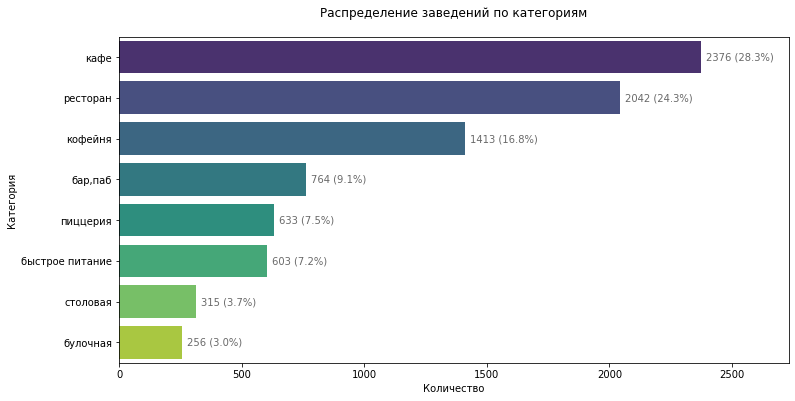

In [29]:
# Распределение по категориям
category_dist = df['category'].value_counts()

# Рассчитываем проценты
total = category_dist.sum()
percentages = (category_dist.values / total) * 100

plt.figure(figsize=(12, 6))

# Построим диаграмму
ax = sns.barplot(
    x=category_dist.values, 
    y=category_dist.index, 
    palette='viridis'
)

# Добавляем аннотации с количеством и процентами
for i, p in enumerate(ax.patches):
    ax.annotate(
        f"{category_dist.values[i]} ({percentages[i]:.1f}%)",  # Формат: число (процент)
        (p.get_width(), p.get_y() + p.get_height()/2),         # Позиция текста
        ha='left', 
        va='center',
        xytext=(5, 0),                                         # Смещение от столбца
        textcoords='offset points',
        fontsize=10,
        color='dimgray'
    )

plt.title('Распределение заведений по категориям', pad=20)
plt.xlabel('Количество')
plt.ylabel('Категория')
plt.xlim(0, category_dist.max() * 1.15)  # Добавляем отступ для текста
plt.show()

**Вывод:**<br/>

Доминируют кафе (28.3%), рестораны (24.3%) и кофейни (16.8%). Быстрые перекусы (фастфуд) и бары занимают 4-8 места.

---

### 3.2. Распределение по районам

Какие административные районы Москвы присутствуют в данных? Исследуем распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы.

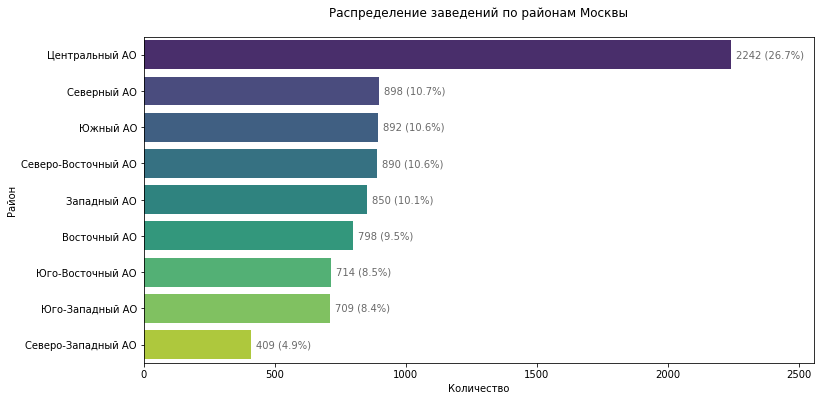

In [30]:
# Сократим наименование административных районов
df['district'] = df['district'].str.replace('административный округ', 'АО', regex=False).str.strip()

# Исследуем распределение количества заведений по административным районам Москвы
district_dist = df['district'].value_counts()

# Рассчитываем проценты
total = district_dist.sum()
percentages = (district_dist.values / total) * 100

plt.figure(figsize=(12, 6))

# Построим диаграмму
ax = sns.barplot(
    x=district_dist.values, 
    y=district_dist.index, 
    palette='viridis'
)

# Добавляем аннотации с количеством и процентами
for i, p in enumerate(ax.patches):
    ax.annotate(
        f"{district_dist.values[i]} ({percentages[i]:.1f}%)",  # Формат: число (процент)
        (p.get_width(), p.get_y() + p.get_height()/2),         # Позиция
        ha='left', 
        va='center',
        xytext=(5, 0),
        textcoords='offset points',
        fontsize=10,
        color='dimgray'
    )

plt.title('Распределение заведений по районам Москвы', pad=20)
plt.xlabel('Количество')
plt.ylabel('Район')
plt.xlim(0, district_dist.max() * 1.14)  # +14% отступ для текста
plt.show()

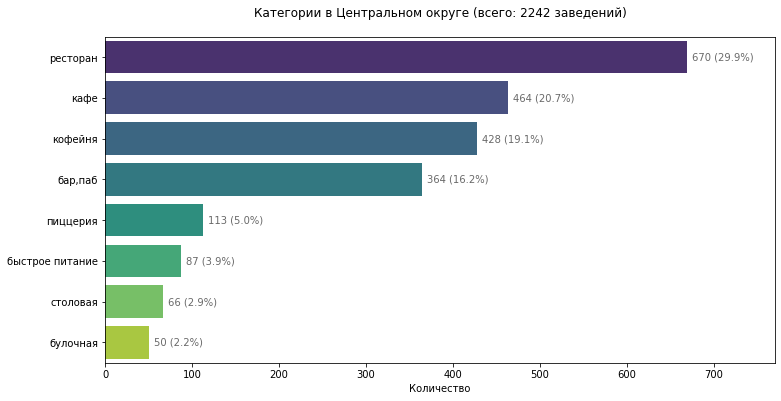

In [31]:
# Категории в Центральном округе
central_data = df[df['district'] == 'Центральный АО']

# Рассчитываем проценты
total = len(central_data)
category_counts = central_data['category'].value_counts()
percentages = (category_counts / total) * 100

plt.figure(figsize=(12, 6))

# Построим диаграмму
ax = sns.countplot(
    y='category',
    data=central_data,
    order=category_counts.index,
    palette="viridis"
)

# Добавляем аннотации с количеством и процентами
for i, p in enumerate(ax.patches):
    current_percentage = percentages.iloc[i]
    current_count = category_counts.iloc[i]
    ax.annotate(
        f"{current_count} ({current_percentage:.1f}%)",  # Формат: число (процент)
        (p.get_width(), p.get_y() + p.get_height()/2),
        ha='left', 
        va='center',
        xytext=(5, 0),
        textcoords='offset points',
        fontsize=10,
        color='dimgray'
    )

plt.title(f'Категории в Центральном округе (всего: {total} заведений)', pad=20)
plt.xlabel('Количество')
plt.ylabel('')
plt.xlim(0, category_counts.max() * 1.15)  # Отступ для текста
plt.show()

**Вывод:**<br/>

- Центральный округ лидирует (26.7% заведений).
- В центре преобладают рестораны (29.9%), кафе (16.2%) и кофейни (20.7%).

---

### 3.3. Соотношение сетевых и несетевых заведений

Изучим соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. Каких заведений больше — сетевых или несетевых? Какие категории заведений чаще являются сетевыми? Исследуем данные, ответим на вопросы и построем необходимые визуализации.

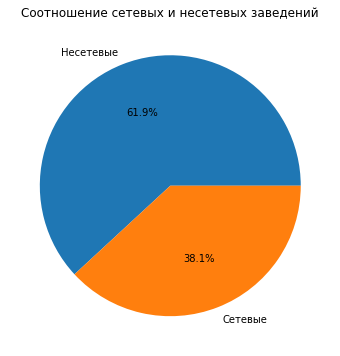

In [32]:
# Общее соотношение
chain_ratio = df['chain'].value_counts(normalize=True)

plt.figure(figsize=(12, 6))

plt.pie(chain_ratio,
        labels=['Несетевые', 'Сетевые'],
        autopct='%1.1f%%')

plt.title('Соотношение сетевых и несетевых заведений')
plt.show()

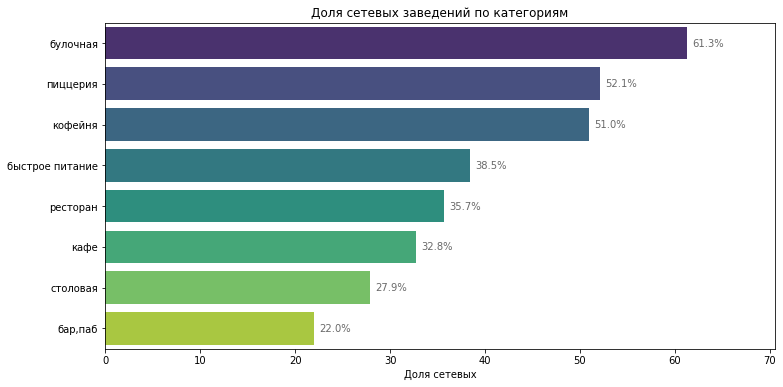

In [33]:
# По категориям
chain_by_category = df.groupby('category')['chain'].mean().sort_values(ascending=False) * 100

plt.figure(figsize=(12, 6))

# Построим диаграмму
ax = sns.barplot(
        x=chain_by_category.values,
        y=chain_by_category.index,
        palette="viridis"
    )

# Добавляем проценты на столбцы
for p in ax.patches:
    ax.annotate(
        f"{p.get_width():.1f}%",  # Форматируем до одного знака после запятой + знак %
        (p.get_width(), p.get_y() + p.get_height()/2),
        ha='left', 
        va='center',
        xytext=(5, 0),
        textcoords='offset points',
        fontsize=10,
        color='dimgray'
    )

plt.title('Доля сетевых заведений по категориям')
plt.xlabel('Доля сетевых')
plt.ylabel('')
plt.xlim(0, chain_by_category.max() * 1.15)  # Добавляем отступ для текста
plt.show()

**Вывод:**<br/>

- Сетевые заведения составляют 38.1%.
- Чаще всего сети встречаются среди булочных (61.3%), пиццерий (52.1%) и кофейн (51%).

---

### 3.4. Анализ посадочных мест

Исследуем количество посадочных мест в заведениях. Встречаются ли в данных аномальные значения или выбросы? Если да, то с чем они могут быть связаны? Приведем для каждой категории заведений наиболее типичное для него количество посадочных мест. Результат сопроводим подходящей визуализацией.


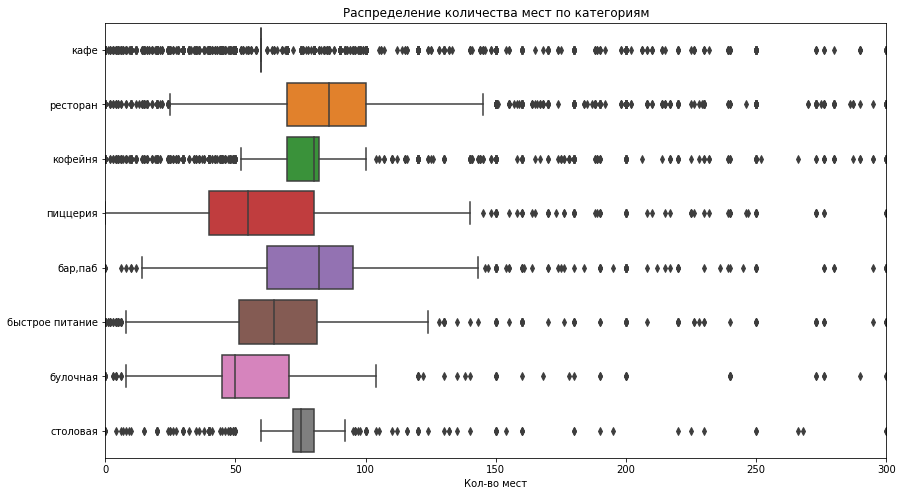

In [34]:
# Распределение мест по категориям
plt.figure(figsize=(14,8))

sns.boxplot(x='seats',
            y='category',
            data=df[df['category'].isin(category_dist.index)])

plt.title('Распределение количества мест по категориям')
plt.xlim(0, 300)
plt.xlabel('Кол-во мест')
plt.ylabel('')
plt.show()

Дополнительно выведем таблицу с медианой и IQR по каждой категории

In [35]:
# Рассчитываем медиану и IQR для каждой категории
stats_table = df.groupby('category')['seats'].agg([
    ('Медиана', 'median'),
    ('IQR (Q3-Q1)', lambda x: x.quantile(0.75) - x.quantile(0.25))
]).sort_values('Медиана', ascending=False)

# Отображаем таблицу
display(stats_table)

,Медиана,IQR (Q3-Q1)
category,,
ресторан,86,30.00
"бар,паб",82,33.00
кофейня,80,12.00
столовая,75,8.00
быстрое питание,65,30.00
кафе,60,0.00
пиццерия,55,40.00
булочная,50,25.75


**Вывод:**<br/>

1. Рестораны и бары/пабы
    - Медиана: 86 и 82 места соответственно.
    - IQR: 30 и 33.<br/>

Это самые крупные заведения с большим количеством посадочных мест. Значительный межквартильный размах (IQR) указывает на сильную вариативность в размерах: есть как небольшие заведения, так и очень вместительные.

2. Кофейни
    - Медиана: 80 мест.
    - IQR: 12.<br/>

Кофейни имеют относительно высокую медиану, но малый разброс (IQR = 12). Это говорит о том, что большинство кофеен имеют схожее количество мест (около 80), что может быть связано с их стандартизированным форматом.

3. Столовые
    - Медиана: 75 мест.
    - IQR: 8.<br/>

Минимальный разброс (IQR = 8) указывает на высокую однородность столовых по количеству мест. Вероятно, это связано с типовыми проектами или ограничениями по площади.

4. Быстрое питание
    - Медиана: 65 мест.
    - IQR: 30.<br/>

Широкий разброс (IQR = 30) говорит о том, что в категории есть как небольшие точки (например, фуд-корты), так и полноценные заведения с обеденной зоной.

5. Кафе
    - Медиана: 60 мест.
    - IQR: 0.<br/>

Нулевой IQR — аномалия. Это может означать:
- Ошибку в данных (например, все кафе в выборке имеют 60 мест).
- Особенность категории (например, искусственное ограничение по лицензии).

6. Пиццерии
    - Медиана: 55 мест.
    - IQR: 40.<br/>

Самый большой разброс (IQR = 40) среди всех категорий. Это указывает на разнообразие форматов: от небольших заведений с доставкой до крупных семейных ресторанов.

7. Булочные
    - Медиана: 50 мест.
    - IQR: 26.<br/>

Умеренный разброс. Большинство булочных ориентированы на формат «кофе с собой», но есть и заведения с посадочными зонами.

---

### 3.5. Распределение рейтингов

Исследуем рейтинг заведений. Визуализируем распределение средних рейтингов по категориям заведений. Сильно ли различаются усреднённые рейтинги для разных типов общепита?

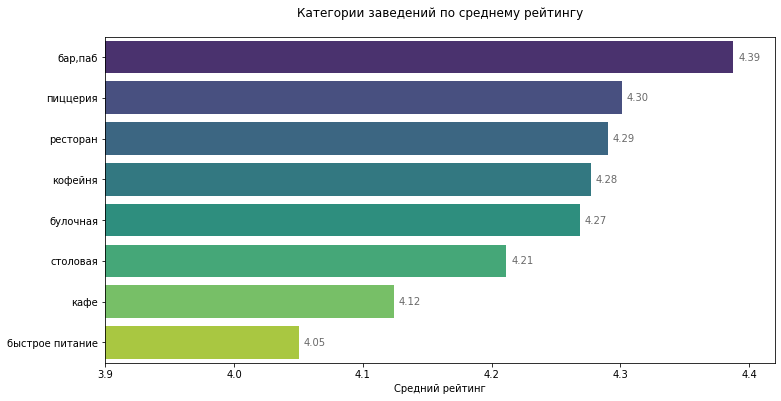

In [36]:
# Средние рейтинги по категориям
rating_by_category = df.groupby('category')['rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))

# Построим диаграмму
ax = sns.barplot(
                x=rating_by_category.values,
                y=rating_by_category.index,
                palette="viridis"
)

# Добавляем значения на столбцы
for p in ax.patches:
    ax.annotate(f"{p.get_width():.2f}",  # Значение ширины столбца (количество)
                (p.get_width(), p.get_y() + p.get_height()/2),  # Позиция текста
                ha='left', va='center',  # Выравнивание
                xytext=(5, 0),           # Смещение относительно позиции
                textcoords='offset points',
                fontsize=10,
                color='dimgrey')

plt.title('Категории заведений по среднему рейтингу', pad=20)
plt.xlabel('Средний рейтинг')
plt.ylabel('')
plt.xlim(3.9, 4.42)  # Добавляем отступ справа для текста
plt.show()

**Вывод:**<br/>

Самые высокие рейтинги у баров (4.39), пиццерий (4.30), и ресторанов (4.29). Кофейни на 4-м месте (4.28).

---

### 3.6. Корреляция рейтинга с другими параметрами

Изучим, с какими данными показывают самую сильную корреляцию рейтинги заведений? Построим и визуализируем матрицу корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным. Выберем самую сильную связь и проверим её.

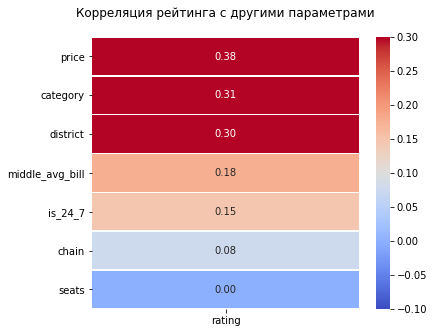

In [37]:
# Выбираем только релевантные столбцы
cols = [
    'category', 'district', 'chain', 'seats', 
    'rating', 'price', 'middle_avg_bill', 'is_24_7'
]

# Удаляем строки с пропусками в ключевых столбцах
df_clean = df[cols].dropna(subset=['rating', 'price', 'middle_avg_bill'])

# Явно указываем числовые столбцы
interval_cols = ['seats', 'middle_avg_bill']

# Вычисляем матрицу pin_k
corr_matrix = df_clean.phik_matrix(
    interval_cols=interval_cols,
    drop_overflow=False
)

# Извлекаем корреляции с рейтингом
rating_corr = corr_matrix[['rating']].drop('rating', axis=0).sort_values(by='rating', ascending=False)

plt.figure(figsize=(6, 5))

# Построим матрицу с использованием цветовых градиентов
sns.heatmap(rating_corr, 
            annot=True, 
            cmap='coolwarm', 
            vmin=-0.1, 
            vmax=0.3,
            fmt=".2f",
            linewidths=0.5)
plt.title('Корреляция рейтинга с другими параметрами', pad=20)
plt.show()

Ценовая категория (`price`) имеет умеренную положительную связь с рейтингом.<br/>

- Гипотеза: Заведения с более высокой ценовой категорией получают больше положительных оценок.
- Проверка: Сравните средние рейтинги по группам:

In [38]:
df.groupby('price')['rating'].mean().sort_values(ascending=False)

price
высокие          4.436611
выше среднего    4.386348
средние          4.297874
низкие           4.173077
не указано       4.166778
Name: rating, dtype: float64

Категория заведения (`category`) влияет на рейтинг:

In [39]:
df.groupby('category')['rating'].mean().sort_values(ascending=False)

category
бар,паб            4.387696
пиццерия           4.301264
ресторан           4.290402
кофейня            4.277282
булочная           4.268359
столовая           4.211429
кафе               4.124285
быстрое питание    4.050249
Name: rating, dtype: float64

Административный район (`district`) влияет на рейтинг.<br/>

- Гипотеза: В некоторых районах (например, Центральном) заведения в среднем получают более высокие оценки.
- Проверка:

In [40]:
df.groupby('district')['rating'].agg(['mean', 'count']).sort_values('mean', ascending=False)

,mean,count
district,,
Центральный АО,4.377520,2242
Северный АО,4.240980,898
Северо-Западный АО,4.208802,409
Южный АО,4.184417,892
Западный АО,4.181647,850
Восточный АО,4.174185,798
Юго-Западный АО,4.172920,709
Северо-Восточный АО,4.147978,890
Юго-Восточный АО,4.101120,714


Проверим самую сильную связь: `price` → `rating`

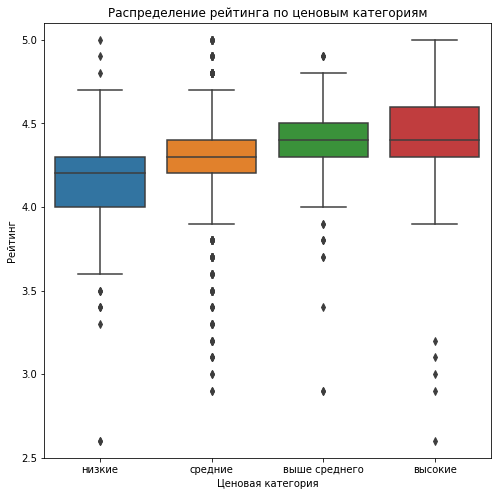

In [41]:
plt.figure(figsize=(8, 8))

sns.boxplot(x='price',
            y='rating',
            data=df_clean,
            order=['низкие', 'средние', 'выше среднего', 'высокие'])

plt.title('Распределение рейтинга по ценовым категориям')
plt.xticks(rotation=0)
plt.xlabel('Ценовая категория')
plt.ylim(2.5, 5.1)
plt.ylabel('Рейтинг')
plt.show()

**Вывод:**<br/>

1. Ценовая категория (`price`):

- Открывать заведения в категориях "выше среднего" и "высокие".
- Низкая ценовая категория может привеси к снижению рейтинга.

2. Категория заведения (`category`):

- Топ-категории: бар,паб, пиццерия, ресторан, кофейня.
- Избегайть: Столовые, кафе и быстрое питание с низкими рейтингами.

3. Район (`district`):

- Приоритет: Центральный административный округ — высокая проходимость и платежеспособная аудитория.

4. Круглосуточный режим (`is_24_7`):

- Незначительное преимущество.

5. Сетевой статус (`chain`):

Сети не гарантируют высокий рейтинг. Лучше делать упор на уникальность.

---

### 3.7. Топ-15 сетей

Сгруппируем данные по названиям заведений и найдите топ-15 популярных сетей в Москве. Для них посчитаем значения среднего рейтинга. Под популярностью понимаем количество заведений этой сети в регионе. К какой категории заведений они относятся? Результат сопроводим подходящими визуализациями.

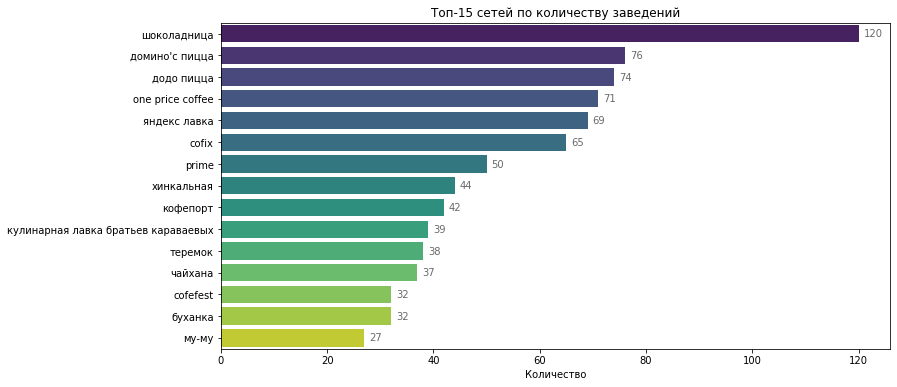

In [42]:
top_chains = df[df['chain']].groupby('name_normalized').agg({'id':'count', 'rating':'mean', 'category':'first'})
top_chains = top_chains[top_chains['id'] >= 5].sort_values('id', ascending=False).head(15)

plt.figure(figsize=(12,6))

# Построим диаграмму
ax = sns.barplot(x=top_chains['id'],
                y=top_chains.index,
                palette="viridis")

# Добавляем значения на столбцы
for p in ax.patches:
    ax.annotate(f"{int(p.get_width())}",  # Значение ширины столбца (количество)
                (p.get_width(), p.get_y() + p.get_height()/2),  # Позиция текста
                ha='left', va='center',  # Выравнивание
                xytext=(5, 0),           # Смещение относительно позиции
                textcoords='offset points',
                fontsize=10,
                color='dimgrey')

plt.title('Топ-15 сетей по количеству заведений')
plt.xlabel('Количество')
plt.ylabel('')
plt.xlim(0, top_chains['id'].max() * 1.05)  # Добавляем отступ справа для текста
plt.show()

**Вывод:**<br/>

Лидеры - "Шоколадница" (120), "домино'с пицца" (76), "додо пицца" (74). Большинство сетей - кофейни и пиццерии.

---

### 3.8. Средний чек по районам

Изучим вариацию среднего чека заведения (столбец `middle_avg_bill`) в зависимости от района Москвы. Проанализируем цены в Центральном административном округе и других. Как удалённость от центра влияет на цены в заведениях?


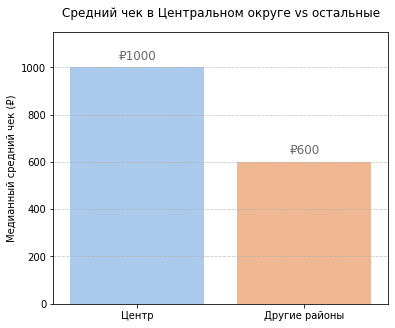

In [43]:
# Средний чек в Центре vs другие
central_avg = df[df['district'] == 'Центральный АО']['middle_avg_bill'].median()
non_central_avg = df[df['district'] != 'Центральный АО']['middle_avg_bill'].median()

plt.figure(figsize=(6, 5))
ax = sns.barplot(
    x=['Центр', 'Другие районы'],
    y=[central_avg, non_central_avg],
    palette="pastel"
)

# Добавляем значения на столбцы
for p in ax.patches:
    ax.annotate(
        f"₽{p.get_height():.0f}",  # Форматируем как рубли без копеек
        (p.get_x() + p.get_width() / 2, p.get_height()),  # Позиция по центру столбца
        ha='center', 
        va='bottom',
        xytext=(0, 5),  # Смещение текста вверх
        textcoords='offset points',
        fontsize=12,
        color='dimgrey'
    )

plt.title('Средний чек в Центральном округе vs остальные', pad=15)
plt.ylabel('Медианный средний чек (₽)')
plt.ylim(0, max(central_avg, non_central_avg) * 1.15)  # +15% отступ сверху
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Вывод:**<br/>

В центре средний чек выше на 40% (1000 ₽ vs 600 ₽ в других районах)

---

### 3.9. Промежуточный вывод

Обобщим полученные результаты, выделим самые важные.

**1. Категории заведений:**<br/>

- Кафе, рестораны и кофейни составляют 70% рынка, что указывает на высокую конкуренцию, но и стабильный спрос.
- Столовые и бары занимают нишевые позиции (4.9% и 5.5% соответственно), что может быть как риском, так и возможностью для дифференциации.

**2. Распределение по районам:**<br/>

- Центральный АО доминирует (26.7% заведений), здесь преобладают рестораны и кофейни. Это зона высокой конкуренции, но и повышенного спроса.
- В других округах (например, Северный, Южный) распределение более равномерное, что может быть перспективным для новых проектов.

**3. Сетевые vs несетевые:**<br/>

- 38.1% заведений — сетевые. Лидеры: булочные (61.3%), пиццерии (52.1%), кофейни (51%).
- Несетевые заведения чаще встречаются среди ресторанов и баров, где уникальность критична.

**4. Посадочные места:**<br/>

- Рестораны и бары имеют наибольшее количество мест (медиана 86 и 82), что соответствует их формату.
- Кофейны и столовые демонстрируют меньший разброс (IQR 12 и 8), указывая на стандартизацию.
- Аномалия: кафе имеют фиксированную медиану 60 мест (IQR=0).

**5. Рейтинги:**<br/>

- Самые высокие оценки у баров (4.39), пиццерий (4.30), ресторанов (4.29).
- Низкие рейтинги у столовых (4.21) и фастфуда (4.05), что может быть связано с качеством обслуживания.

**6. Корреляции:**<br/>

- Ценовая категория и рейтинг положительно связаны: заведения с ценами «выше среднего» имеют более высокие оценки (4.43).
- Центральный округ коррелирует с высокими рейтингами (4.38), что объясняется концентрацией премиальных заведений.

**7. Топ сетей:**<br/>

- Лидеры: Шоколадница (120 заведений), Додо Пицца (74), Домино’с (76).
- Средние рейтинги сетей (4.0–4.3) указывают на стабильность, но отсутствие уникальности.

**8. Средний чек:**<br/>

- В Центральном округе медианный чек 1000 ₽ против 600 ₽ в других районах. Разрыв в 40% отражает различия в аудитории и затратах.

## 4. Итоговый вывод и рекомендации


**1. Общий обзор проделанной работы**<br/>

Проведён анализ 8406 заведений Москвы с акцентом на категории, локации, сетевой статус, рейтинги и цены. Выявлены ключевые закономерности, влияющие на успешность проектов в сфере общепита.

**2. Главные выводы**<br/>

Категории:
- Кафе, рестораны, кофейни — самые распространённые, но высококонкурентные.
- Пиццерии и булочные чаще являются сетевыми.

Локация:
- Центральный АО — лидер по количеству заведений и среднему чеку, но высокая аренда и конкуренция.
- В других округах ниже конкуренция, но и платежеспособность аудитории.

Рейтинги:
- Зависят от ценовой категории и специализации. Премиум-сегмент ассоциируется с высокими оценками.

Сети:
- Сетевые форматы доминируют в сегментах с низким порогом входа (кофейни, пиццерии).

Цены:
- Средний чек в Центре на 40% выше, чем в других районах.

**3. Рекомендации**<br/>

Выбор формата:
- Сетевые проекты: Пиццерии или кофейни (низкие операционные риски, стандартизация).
- Премиум-сегмент: Рестораны или бары в Центральном АО (высокий чек, но требуют уникальности).

Локация:
- Центральный АО: Для премиальных заведений с упором на качество и атмосферу.
- Спальные районы: Кафе или демократичные кофейни с акцентом на доступность.

Ценовая политика:
- В Центре — категории «выше среднего» (средний чек 1000–1500 ₽).
- В других районах — «средние» цены (500–800 ₽) для привлечения местной аудитории.

Оптимизация мест:
- Для кофеен — 60-80 посадочных мест, для ресторанов — 80-100.

Дифференциация:
- Внедрить уникальное меню или концепцию.

**Заключение:**<br/>

Наиболее перспективны сетевые кофейни или пиццерии в спальных районах с демократичными ценами либо премиальные рестораны в Центральном округе. Ключевые факторы успеха — баланс между локацией, ценовой политикой и уникальностью концепции.